In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
pd.set_option("display.max_row", 45)
pd.set_option("display.max_column", 45)
data = pd.read_csv("UNSW_NB15_training-set.csv")
data2 = pd.read_csv("UNSW_NB15_testing-set.csv")

In [162]:
data.shape[0] + data2.shape[0]

257673

In [163]:
data2

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.980570,3721.068786,120.177727,255,3518776216,3453092386,255,0.099440,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


In [164]:
dataset = pd.concat([data,data2], ignore_index=True, axis=0)

In [165]:
df = dataset.copy()

In [166]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
257669,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
257670,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
257671,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


In [167]:
df["attack_cat"].value_counts()


Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

In [168]:
df["attack_cat"].value_counts(normalize = True) * 100

Normal            36.092256
Generic           22.847175
Exploits          17.279653
Fuzzers            9.409601
DoS                6.346416
Reconnaissance     5.428198
Analysis           1.038914
Backdoor           0.903859
Shellcode          0.586402
Worms              0.067527
Name: attack_cat, dtype: float64

<BarContainer object of 10 artists>

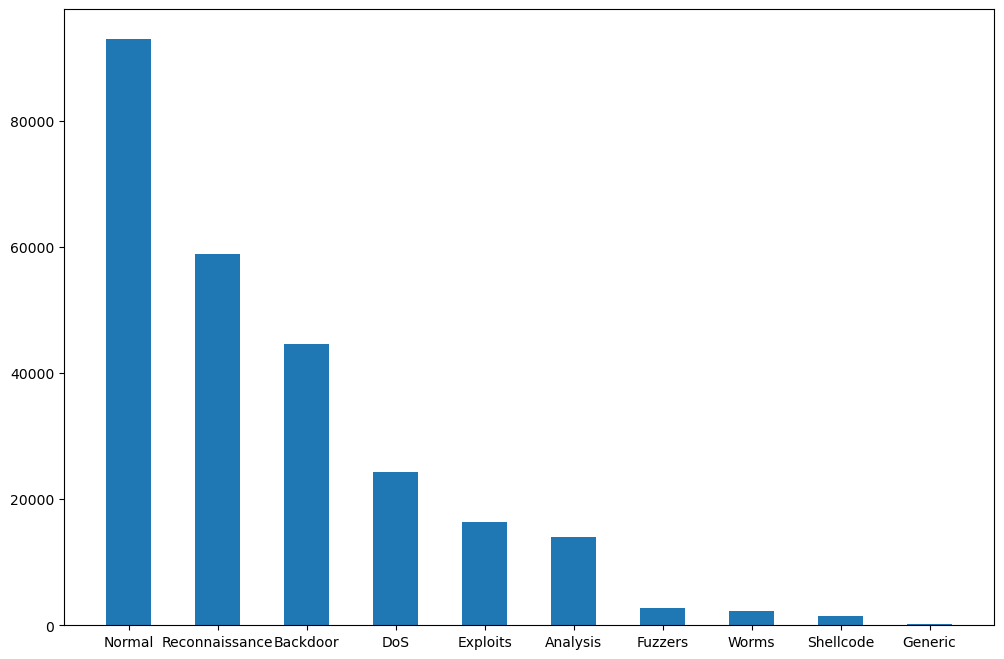

In [169]:
plt.figure(figsize=(12, 8))
plt.bar(df["attack_cat"].unique(), df["attack_cat"].value_counts(), width = 0.5)

stratificaion

In [170]:
df.drop_duplicates(inplace= False).shape

(257673, 45)

In [171]:
df.dtypes.value_counts()

int64      30
float64    11
object      4
dtype: int64

In [172]:
for col in df.select_dtypes("object"):    
    print(f"{col :-<20} {df[col].unique()}, total: {len(df[col].unique())}")

proto--------------- ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' 'ptp' 'fire' 'crtp' 

In [173]:
for col in df.select_dtypes("object"):
    print(col, ":", len(df[col].unique()), "valeur unique")  

proto : 133 valeur unique
service : 13 valeur unique
state : 11 valeur unique
attack_cat : 10 valeur unique


In [174]:
df["service"].value_counts()

-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In [175]:
df["proto"].value_counts()

tcp       123041
udp        92701
unas       15599
arp         3846
ospf        3271
           ...  
netblt       131
rdp          131
igmp          48
icmp          15
rtp            1
Name: proto, Length: 133, dtype: int64

In [176]:
df.isna().value_counts()

id     dur    proto  service  state  spkts  dpkts  sbytes  dbytes  rate   sttl   dttl   sload  dload  sloss  dloss  sinpkt  dinpkt  sjit   djit   swin   stcpb  dtcpb  dwin   tcprtt  synack  ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  label
False  False  False  False    False  False  False  False   False   False  False  False  False  False  False  False  False   False   False  False  False  False  False  False  False   False   False   False  False  False        False              False       False         False       False             False             False           False         False       False             False       False       False            False       False    257673
dtype: int64

In [177]:
((df[df.columns] == 0).sum() / df.shape[0]).sort_values()

id                   0.000000
ct_srv_src           0.000000
ct_dst_ltm           0.000000
ct_src_dport_ltm     0.000000
ct_dst_sport_ltm     0.000000
ct_dst_src_ltm       0.000000
smean                0.000000
ct_src_ltm           0.000000
attack_cat           0.000000
ct_srv_dst           0.000000
spkts                0.000000
state                0.000000
service              0.000000
proto                0.000000
sbytes               0.000000
sinpkt               0.003035
dur                  0.013998
rate                 0.015399
sload                0.015430
sttl                 0.016339
ct_state_ttl         0.224455
label                0.360923
dpkts                0.466824
dbytes               0.466824
dmean                0.466824
dload                0.466882
dinpkt               0.466902
dttl                 0.467410
sjit                 0.493432
swin                 0.522492
sloss                0.523019
djit                 0.525065
stcpb                0.532175
dtcpb     

dropping id and lebel columns

In [178]:
df =df.drop(["id", "label"], axis = 1)
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal


In [179]:
print("Nombre de lignes dupliquées :", df.duplicated().sum())    # keep = first par defaut

Nombre de lignes dupliquées : 94928


In [180]:
df.loc[df.duplicated(), :]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
10,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.0,0,0,60000.688000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal
11,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.0,0,0,60000.712000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal
39,59.995674,arp,-,INT,2,0,92,0,0.016668,0,0,6.133776e+00,0.0,0,0,59998.196000,0.0,13.651471,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal
41,59.995678,arp,-,INT,2,0,92,0,0.016668,0,0,6.133775e+00,0.0,0,0,59998.200000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal
53,14.846565,tcp,-,REQ,22,0,990,0,1.414469,254,0,5.092087e+02,0.0,21,0,706.979312,0.0,965.398187,0.0,255,0,0,0,0.0,0.0,0.0,45,0,0,0,17,6,4,3,3,14,0,0,0,3,15,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257667,0.000006,udp,dns,INT,2,0,114,0,166666.660800,254,0,7.600000e+07,0.0,0,0,0.006000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,45,2,33,33,17,45,0,0,0,33,45,0,Generic
257668,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.0,0,0,0.009000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic
257670,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.0,0,0,0.009000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic
257671,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.0,0,0,0.009000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic


# Preprocessing

### .Suppression des lignes dupliquées

In [181]:
df.duplicated().sum()

94928

In [182]:
print(df.shape)

(257673, 43)


In [183]:
df = df.drop_duplicates(keep = "first")
print(df.shape)
df.head()

(162745, 43)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal


### .Train et test sets

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
y = df["attack_cat"]
X = df.drop("attack_cat", axis = 1)

In [186]:
X.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0


In [187]:
y.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: attack_cat, dtype: object

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [189]:
print(X_train.shape)
print(X_test.shape)

(130196, 42)
(32549, 42)


In [190]:
X_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
100527,1.032853,tcp,http,FIN,12,18,1580,10168,28.077567,31,29,11223.281250,7.438812e+04,3,5,93.789094,60.727179,9560.547895,7698.693560,255,1958185426,1959228632,255,0.000606,0.000488,0.000118,132,565,1,3924,1,0,5,1,1,2,0,0,1,9,1,0
158807,1.517164,tcp,-,FIN,24,70,1250,72074,61.298581,62,252,6317.049316,3.746200e+05,6,33,65.963656,20.726695,3129.826380,1714.511155,255,358465748,2285809096,255,0.111544,0.041789,0.069755,52,1030,0,0,1,1,1,1,1,1,0,0,0,1,1,0
82600,0.001123,udp,dns,CON,2,2,132,164,2671.415725,31,29,470169.156300,5.841496e+05,0,0,0.009000,0.007000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,66,82,0,0,5,0,4,1,1,2,0,0,0,1,10,0
252225,32.309582,tcp,-,FIN,20,14,3688,622,1.021369,254,252,867.606384,1.431154e+02,6,1,1697.957158,2477.435750,223734.257300,8214.239500,255,1845400865,1506839094,255,0.138675,0.102908,0.035767,184,44,0,0,4,1,2,1,1,2,0,0,0,2,5,0
94492,0.002783,tcp,ftp-data,FIN,6,8,320,1826,4671.218104,31,29,767517.062500,4.593604e+06,1,2,0.494400,0.329000,27.625737,0.538767,255,2769155623,628129696,255,0.000599,0.000475,0.000124,53,228,0,0,3,0,5,1,1,4,0,0,0,8,5,0


### .Standardisation

In [191]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [192]:
numCols = X_train.select_dtypes(exclude=object)
nameNumCols = numCols.columns
print(nameNumCols)
numCols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
100527,1.032853,12,18,1580,10168,28.077567,31,29,11223.281250,7.438812e+04,3,5,93.789094,60.727179,9560.547895,7698.693560,255,1958185426,1959228632,255,0.000606,0.000488,0.000118,132,565,1,3924,1,0,5,1,1,2,0,0,1,9,1,0
158807,1.517164,24,70,1250,72074,61.298581,62,252,6317.049316,3.746200e+05,6,33,65.963656,20.726695,3129.826380,1714.511155,255,358465748,2285809096,255,0.111544,0.041789,0.069755,52,1030,0,0,1,1,1,1,1,1,0,0,0,1,1,0
82600,0.001123,2,2,132,164,2671.415725,31,29,470169.156300,5.841496e+05,0,0,0.009000,0.007000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,66,82,0,0,5,0,4,1,1,2,0,0,0,1,10,0
252225,32.309582,20,14,3688,622,1.021369,254,252,867.606384,1.431154e+02,6,1,1697.957158,2477.435750,223734.257300,8214.239500,255,1845400865,1506839094,255,0.138675,0.102908,0.035767,184,44,0,0,4,1,2,1,1,2,0,0,0,2,5,0
94492,0.002783,6,8,320,1826,4671.218104,31,29,767517.062500,4.593604e+06,1,2,0.494400,0.329000,27.625737,0.538767,255,2769155623,628129696,255,0.000599,0.000475,0.000124,53,228,0,0,3,0,5,1,1,4,0,0,0,8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109400,0.001095,2,2,146,178,2739.726138,31,29,533333.375000,6.502283e+05,0,0,0.009000,0.007000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,73,89,0,0,4,0,2,1,1,4,0,0,0,3,2,0
66269,8.783844,12,0,540,0,1.252299,254,0,450.827667,0.000000e+00,11,0,798.531250,0.000000,1296.280625,0.000000,255,0,0,0,0.000000,0.000000,0.000000,45,0,0,0,29,6,22,2,2,28,0,0,0,23,28,0
196510,0.727695,10,6,1072,268,20.613032,254,252,10608.840820,2.462570e+03,2,1,71.417111,124.431000,3846.122158,163.523453,255,2037741495,3270249673,255,0.183132,0.105531,0.077601,107,45,1,0,2,1,1,1,1,1,0,0,1,1,1,0
118022,0.375080,28,30,4840,3080,151.967585,31,29,99562.765630,6.351712e+04,7,7,13.880407,12.915725,858.479728,22.636604,255,2771430989,2774570246,255,0.000663,0.000520,0.000143,173,103,0,0,6,0,3,1,1,3,0,0,0,1,7,0


In [193]:
scaler = StandardScaler()
scaledTrain = scaler.fit_transform(X_train.select_dtypes(exclude = object))
scaledTest = scaler.transform(X_test.select_dtypes(exclude = object))

In [194]:
def applyScaling(data, column):
    index = 0
    for floatCol in data.select_dtypes(exclude = object):
        data[floatCol] = column[:, index]
        index += 1
    
    return data

In [195]:
X_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
100527,1.032853,tcp,http,FIN,12,18,1580,10168,28.077567,31,29,11223.281250,7.438812e+04,3,5,93.789094,60.727179,9560.547895,7698.693560,255,1958185426,1959228632,255,0.000606,0.000488,0.000118,132,565,1,3924,1,0,5,1,1,2,0,0,1,9,1,0
158807,1.517164,tcp,-,FIN,24,70,1250,72074,61.298581,62,252,6317.049316,3.746200e+05,6,33,65.963656,20.726695,3129.826380,1714.511155,255,358465748,2285809096,255,0.111544,0.041789,0.069755,52,1030,0,0,1,1,1,1,1,1,0,0,0,1,1,0
82600,0.001123,udp,dns,CON,2,2,132,164,2671.415725,31,29,470169.156300,5.841496e+05,0,0,0.009000,0.007000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,66,82,0,0,5,0,4,1,1,2,0,0,0,1,10,0
252225,32.309582,tcp,-,FIN,20,14,3688,622,1.021369,254,252,867.606384,1.431154e+02,6,1,1697.957158,2477.435750,223734.257300,8214.239500,255,1845400865,1506839094,255,0.138675,0.102908,0.035767,184,44,0,0,4,1,2,1,1,2,0,0,0,2,5,0
94492,0.002783,tcp,ftp-data,FIN,6,8,320,1826,4671.218104,31,29,767517.062500,4.593604e+06,1,2,0.494400,0.329000,27.625737,0.538767,255,2769155623,628129696,255,0.000599,0.000475,0.000124,53,228,0,0,3,0,5,1,1,4,0,0,0,8,5,0


In [196]:
X_train = applyScaling(X_train, scaledTrain)
X_test = applyScaling(X_test, scaledTest)
X_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
100527,-0.043599,tcp,http,FIN,-0.097639,-0.074799,-0.051944,-0.065747,-0.335304,-1.075889,-0.829794,-0.234688,-0.325061,-0.054649,-0.079594,-0.069018,-0.043351,0.094067,1.510506,0.626653,0.305035,0.308464,0.643011,-0.633921,-0.549864,-0.625752,-0.153900,1.274638,0.939536,0.014644,-0.673626,-0.975521,0.441629,-0.298352,-0.209912,-0.310919,-0.120791,-0.120772,1.400835,1.028436,-0.626531,-0.063202
158807,0.051457,tcp,-,FIN,-0.027613,0.289904,-0.053442,0.264961,-0.335017,-0.787349,1.080691,-0.234711,-0.224096,-0.018503,0.327992,-0.076062,-0.080376,-0.056985,0.208225,0.626653,-0.813777,0.537298,0.643011,0.405072,0.107004,0.690187,-0.480652,2.842144,-0.174291,-0.051058,-0.673626,0.066116,-0.513410,-0.298352,-0.209912,-0.469376,-0.120791,-0.120772,-0.297854,-0.584067,-0.626531,-0.063202
82600,-0.246098,udp,dns,CON,-0.155995,-0.187015,-0.058517,-0.119189,-0.312464,-1.075889,-0.829794,-0.232470,-0.153633,-0.090796,-0.152378,-0.092760,-0.099555,-0.130501,-0.164888,-1.595930,-1.064481,-1.064363,-1.555314,-0.639597,-0.557625,-0.627981,-0.423471,-0.353546,-0.174291,-0.051058,-0.062789,-0.975521,0.202869,-0.298352,-0.209912,-0.310919,-0.120791,-0.120772,-0.297854,-0.584067,0.768601,-0.063202
252225,6.095112,tcp,-,FIN,-0.050955,-0.102853,-0.042376,-0.116742,-0.335537,0.999741,1.080691,-0.234738,-0.350029,-0.018503,-0.137821,0.337113,2.193587,5.124819,1.622700,0.626653,0.226156,-0.008524,0.643011,0.659168,1.079065,0.047912,0.058490,-0.481644,-0.174291,-0.051058,-0.215498,0.066116,-0.274650,-0.298352,-0.209912,-0.310919,-0.120791,-0.120772,-0.297854,-0.382504,-0.006472,-0.063202
94492,-0.245772,tcp,ftp-data,FIN,-0.132653,-0.144934,-0.057664,-0.110310,-0.295184,-1.075889,-0.829794,-0.231034,1.194708,-0.078747,-0.123264,-0.092637,-0.099257,-0.129852,-0.164771,0.626653,0.872211,-0.624234,0.643011,-0.633987,-0.550070,-0.625638,-0.476568,0.138617,-0.174291,-0.051058,-0.368207,-0.975521,0.441629,-0.298352,-0.209912,0.005994,-0.120791,-0.120772,-0.297854,0.826873,-0.006472,-0.063202


### .Encodage (Label Encoding et One Hot Encoding)

In [197]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer

In [198]:
LEncoder = LabelEncoder()
y_train = LEncoder.fit_transform(y_train)
y_test = LEncoder.transform(y_test)

In [199]:
y_train[:10]

array([6, 3, 6, 4, 6, 6, 0, 6, 5, 6])

In [200]:
columns_transformed = make_column_transformer((OneHotEncoder(handle_unknown = "ignore"), ["proto", "service", "state"]), remainder = "passthrough")

In [201]:
print(X_train.shape)
print(X_test.shape)

(130196, 42)
(32549, 42)


In [202]:
X_train = columns_transformed.fit_transform(X_train).toarray()
X_test = columns_transformed.transform(X_test).toarray()

In [203]:
print(X_train.shape)
print(X_test.shape)

(130196, 194)
(32549, 194)


### .Modélisation

In [204]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier